<a href="https://colab.research.google.com/github/Geilson-Araujo/Data_Mining/blob/master/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!apt-get -qq install tree
!mkdir /tmp/lobo_guara

# Download the image from www.nationalgeographicbrasil.com
!wget --quiet https://static.nationalgeographicbrasil.com/files/styles/image_3200/public/02gambarini_779-24.jpg -O  /tmp/lobo_guara/lobo_guara_0.jpg

mkdir: cannot create directory ‘/tmp/lobo_guara’: File exists


## Data augmentation

In [19]:
import os

import matplotlib.pyplot as plt
import cv2

from tqdm.notebook import tqdm

import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms

torch.manual_seed(0);

In [6]:
IMG_PATH = '/tmp/lobo_guara/lobo_guara_0.jpg'
ROOT_DIR = '/tmp/lobo_guara/'

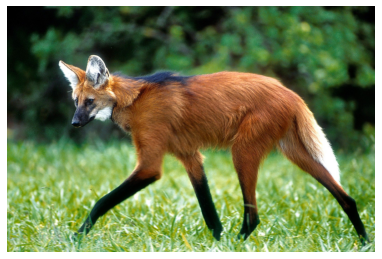

In [8]:
# Show the source image
img = cv2.imread(IMG_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
# plt.title('Lobo Guará')
plt.tight_layout()
plt.axis('off');

In [10]:
# Make some copies of the original photo
for i in tqdm(range(1, 32)):    
    cv2.imwrite(os.path.join(ROOT_DIR, f'lobo_guara_{i}.jpg'),
                cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [11]:
# Show the number of images
!tree --filelimit 5 /tmp/

/tmp/
└── lobo_guara [32 entries exceeds filelimit, not opening dir]

1 directory, 0 files


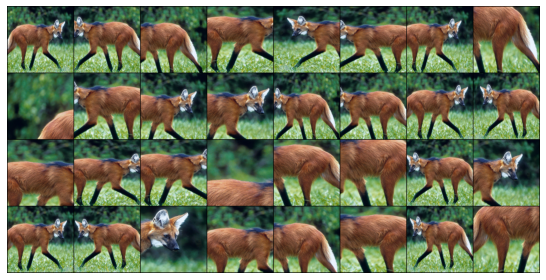

In [40]:
transform = transforms.Compose([    
    transforms.RandomResizedCrop((224, 224)),
    transforms.RandomHorizontalFlip(),    
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
    ])

# Prepare dataset and dataloader
ds = torchvision.datasets.ImageFolder(root='/tmp/', transform=transform)
dl = torch.utils.data.DataLoader(ds, batch_size=32, 
                                 num_workers=2) # os.cpu_count()

# Plot a grid of images
images, labels = next(iter(dl))
grid = torchvision.utils.make_grid(images, normalize=True, )
plt.figure(figsize=(8, 4))
plt.imshow(grid.permute(1, 2, 0)); plt.axis('off'), plt.tight_layout();

# plt.savefig('lobo_guara_grid.jpg', quality=95, optimize=True, format='png',
#             bbox_inches='tight')